Created by: Radhika Aggarwal<br>
### Predictive Maintenance Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
dataset_name= r"predictive_maintenance.csv"

data= pd.read_csv(dataset_name)
data.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure_Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Data Pre-processing

In [4]:
data= data.drop(['UDI', 'Product ID'], axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure_Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


### Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is an approach to perform initial investigations on data to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of statistics and graphical representations.

In [5]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
data.groupby(['Target', 'Failure_Type']).count().drop(['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Air temperature [K]'], axis= 1).rename(columns= {'Type': 'count'})

count
Target Failure_Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [7]:
data.groupby(['Target', 'Failure_Type']).median()

Air temperature [K]  Process temperature [K]  \
Target Failure_Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure_Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure_Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [8]:
data.groupby(['Type', 'Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

In [9]:
data_numeric= data.loc[:, ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
data_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

<AxesSubplot:xlabel='Target', ylabel='count'>

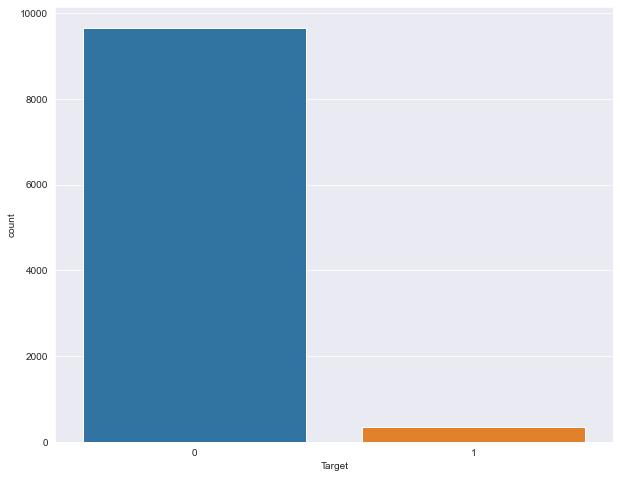

In [10]:
plt.figure(figsize=(10, 8))
sns.countplot(data= data, x= 'Target')

<AxesSubplot:xlabel='Failure_Type', ylabel='count'>

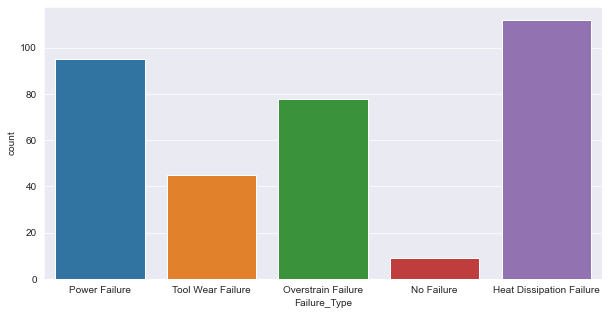

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data= data[data['Target']==1], x='Failure_Type')

In [12]:
import plotly.graph_objects as go
import plotly.express as px
fig= px.pie(data, title='Failure Types', names='Failure_Type')
fig.show()

In [13]:
fig= px.box(data, y= 'Air temperature [K]', x= 'Target', title='Air temperature relation with Target and Failure Type',
color= 'Failure_Type', width= 800, height= 400)
fig.show()

In [14]:
fig= px.box(data, y= 'Process temperature [K]', x= 'Target', title='Process Temperature relation with Target and Failure Type',
color= 'Failure_Type', width=800, height=400)
fig.show()

In [15]:
fig= px.box(data, y= 'Air temperature [K]', x= 'Target', title='Rotational Speed [rpm] relation with Target and Failure Type',
color= 'Failure_Type', width=800, height=400)
fig.show()

In [16]:
fig= px.box(data, y= 'Torque [Nm]', x= 'Target', title='Torque [Nm] relation with Target and Failure Type',
color= 'Failure_Type', width=800, height=400)
fig.show()

In [17]:
fig= px.box(data, y= 'Tool wear [min]', x= 'Target', title='Tool wear [min] relation with Target and Failure Type',
color= 'Failure_Type', width=800, height=400)
fig.show()

In [18]:
pd.pivot_table(data, index= 'Failure_Type', columns='Type', aggfunc='count')

Air temperature [K]              \
Type                                       H     L     M   
Failure_Type                                               
Heat Dissipation Failure                   8    74    30   
No Failure                               979  5757  2916   
Overstrain Failure                         1    73     4   
Power Failure                              5    59    31   
Random Failures                            4    12     2   
Tool Wear Failure                          6    25    14   

                         Process temperature [K]              \
Type                                           H     L     M   
Failure_Type                                                   
Heat Dissipation Failure                       8    74    30   
No Failure                                   979  5757  2916   
Overstrain Failure                             1    73     4   
Power Failure                                  5    59    31   
Random Failures                                4    12     2   
Tool Wear Failure                              6    25    14   

                         Rotational speed [rpm]             Target        \
Type                                          H     L     M      H     L   
Failure_Type                                                               
Heat Dissipation Failure                      8    74    30      8    74   
No Failure                                  979  5757  2916    979  5757   
Overstrain Failure                            1    73     4      1    73   
Power Failure                                 5    59    31      5    59   
Random Failures                               4    12     2      4    12   
Tool Wear Failure                             6    25    14      6    25   

                               Tool wear [min]             Torque [Nm]        \
Type                         M               H     L     M           H     L   
Failure_Type                                                                   
Heat Dissipation Failure    30               8    74    30           8    74   
No Failure                2916             979  5757  2916         979  5757   
Overstrain Failure           4               1    73     4           1    73   
Power Failure               31               5    59    31           5    59   
Random Failures              2               4    12     2           4    12   
Tool Wear Failure           14               6    25    14           6    25   

                                
Type                         M  
Failure_Type                    
Heat Dissipation Failure    30  
No Failure                2916  
Overstrain Failure           4  
Power Failure               31  
Random Failures              2  
Tool Wear Failure           14

In [19]:
pd.pivot_table(data, index= 'Target', columns='Type', aggfunc='count')

Air temperature [K]             Failure_Type              \
Type                     H     L     M            H     L     M   
Target                                                            
0                      982  5765  2914          982  5765  2914   
1                       21   235    83           21   235    83   

       Process temperature [K]             Rotational speed [rpm]              \
Type                         H     L     M                      H     L     M   
Target                                                                          
0                          982  5765  2914                    982  5765  2914   
1                           21   235    83                     21   235    83   

       Tool wear [min]             Torque [Nm]              
Type                 H     L     M           H     L     M  
Target                                                      
0                  982  5765  2914         982  5765  2914  
1                   21   235    83          21   235    83

In [20]:
data['Failure_Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure_Type, dtype: int64

### Data Preprocessing for Prediction

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

label_encoder.fit(data['Type'])
data['Type']= label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target']= label_encoder.transform(data['Target'])

label_encoder.fit(data['Failure_Type'])
data['Failure_Type']= label_encoder.transform(data['Failure_Type'])

In [22]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure_Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,1
9996,0,298.9,308.4,1632,31.8,17,0,1
9997,2,299.0,308.6,1645,33.4,22,0,1
9998,0,299.0,308.7,1408,48.5,25,0,1


In [23]:
data['Failure_Type'].value_counts()

#no failure- 1
#hd- 0
#power- 3
#overstrain- 2
#tool wear- 5
#random- 4

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure_Type, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data.drop(['Failure_Type', 'Target'], axis=1),
data['Failure_Type'], test_size= 0.3, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [26]:
import time
from sklearn.metrics import accuracy_score, classification_report

classifier= []
imported_as= []

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#### KNN (K- Nearest Neighbor)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
classifier.append(' K Nearest Neighbors')
imported_as.append('knn')

#### SVM (Support Vector Machines)

In [29]:
from sklearn.svm import SVC
svc= SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#### Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
classifier.append('Naive Bayes')
imported_as.append('nb')

#### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
dt= DecisionTreeClassifier()

classifier.append('Decision Tree')
imported_as.append('dt')
print(dt)

DecisionTreeClassifier()


In [33]:
classifiers= pd.DataFrame({'Classifier':classifier, 'Imported as': imported_as})
print('All models imported\nModels stored in dataframe called classifiers')

All models imported
Models stored in dataframe called classifiers


In [34]:
display(classifiers)

,Classifier,Imported as
0,Logistic Regression,lr
1,K Nearest Neighbors,knn
2,Support Vector Machine,svc
3,Random Forest,rfc
4,Naive Bayes,nb
5,Decision Tree,dt


In [38]:
class Modelling:
    def __init__(self, x_train, y_train, x_test, y_test, models):
        self.x_train= x_train
        self.x_test= x_test
        self.y_train= y_train
        self.y_test= y_test
        self.models= models
    
    def fit(self):
        model_acc= []
        model_time= []

        for i in self.models:
            start= time.time()
            if i == 'knn':
                accuracy= []
                for j in range(1, 200):
                    kn= KNeighborsClassifier(n_neighbors= j)
                    kn.fit(self.x_train, self.y_train)
                    predK= kn.predict(self.x_test)
                    accuracy.append([accuracy_score(self.y_test, predK), j])
                temp= accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp= m
                self.models[i]= KNeighborsClassifier(n_neighbors=temp[1])
            self.models[i].fit(self.x_train, self.y_train)
            model_acc.append(accuracy_score(self.y_test, self.models[i].predict(self.x_test)))
            stop= time.time()
            model_time.append((stop-start))
            print(self.models[i], 'has been fit')
        self.models_output= pd.DataFrame({'Models': list(self.models.values()), 'Accuracy': model_acc, 'Runtime (s)': model_time,})
        # return self.models_output
        # return list(self.models[0])
    
    def results(self):
        umodels= self.models_output
        umodels= umodels.sort_values(by= ['Accuracy', 'Runtime (s)'], ascending=[False, True]).reset_index().drop('index', axis=1)
        self.best= umodels['Models'][0]
        umodels['Models']= umodels['Models'].astype(str).str.split("(", n=2, expand= True)[0]
        umodels['Accuracy']= umodels['Accuracy'].round(5)*100
        self.models_output_cleaned= umodels
        return (umodels)
    
    def best_model(self, type):
        if type== 'model':
            return(self.best)
        elif type== 'name':
            return(self.models_output_cleaned['Models'][0])
        elif type== 'object':
            for i in self.models:
                if self.best == self.models[i]:
                    return str(i)
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0], 3))

    def best_model_predict(self, x_test):
        return(self.best.predict(scaler.fit_transform(x_test)))

    def best_model_clmatrix(self):
        return(classification_report(self.y_test, self.best.predict(self.x_test)))


        

In [39]:
models_to_test= {'rfc':rfc, 'lr':lr, 'knn':knn, 'svc':svc, 'nb':nb, 'dt':dt}

In [40]:
classification= Modelling(x_train, y_train, x_test, y_test, models_to_test)
print(classification.fit())
classification.results()

RandomForestClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=6) has been fit
SVC() has been fit
GaussianNB() has been fit
DecisionTreeClassifier() has been fit
None


,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,98.333,1.378307
1,LogisticRegression,97.867,0.488694
2,DecisionTreeClassifier,97.600,0.037905
3,KNeighborsClassifier,97.567,95.908309
4,SVC,97.400,0.896575
5,GaussianNB,94.967,0.004987


In [41]:
print(classification)

## Conclusion

In [42]:
print('Best Model is: ', classification.best_model(type='object'))
print('Accuracy of model: ', classification.best_model_accuracy())
print('training run-time in seconds: ', classification.best_model_runtime())
print('Classification Matrix:\n', classification.best_model_clmatrix())

Best Model is:  rfc
Accuracy of model:  98.333
training run-time in seconds:  1.378
Classification Matrix:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.99      1.00      0.99      2903
           2       0.85      0.50      0.63        22
           3       0.84      0.87      0.86        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.58      0.53      0.55      3000
weighted avg       0.98      0.98      0.98      3000



c:\Users\Radhika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Radhika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Radhika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
a= np.array([2,298.8,308.9,1455,41.3,216])
a= a.reshape(1, -1)
print('Prediction on given input: ', classification.best_model_predict(a))

Prediction on given input:  [1]


In [44]:
b= np.array( [[1,298,308.3,1362,56.8,11]])
b= b.reshape(1, -1)
print('Prediction on given input: ', classification.best_model_predict(b ))

Prediction on given input:  [1]


In [47]:
plot= pd.read_csv(dataset_name)
import plotly.express as px
fig= px.scatter_3d(plot, x= 'Air temperature [K]', y='Rotational speed [rpm]', z='Torque [Nm]', color='Failure_Type')
fig.show()